# Loading and Preparing the Loan Data

First, read in the CSV.

In [1]:
import pandas as pd

loan_data_raw = pd.read_csv('./data/SBAnational.csv')
loan_data_raw.head()

/tmp/ipykernel_140595/1409888286.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_raw = pd.read_csv('./data/SBAnational.csv')


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [2]:
loan_data_raw.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

Investigate the column (ApprovalFY) that has a warning of containing mixed data types.

In [3]:
loan_data_raw['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1962, 1982, 1965, 1966, 1983, 1973, 1984, 2007,
       1985, 1986, 1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010,
       1967, 2011, 1992, 1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977,
       1976, 1968, '2004', '1994', '1979', '1976', '1967', '1975', '1974',
       '1977', '1981', '1982', '1983', '1984', '1978', '1980', '1968',
       '1976A', '1969', '1995', '1970', '2005', '1996', '1971', 1996,
       1971], dtype=object)

It appears the years are being read numerically, but after encountering a row of '1976A', they're converted to strings. We can easily change 1976A to 1976 then convert the entire column to be numeric.

In [4]:
loan_data_raw[loan_data_raw['ApprovalFY'] == '1976A'] = 1976
loan_data_raw['ApprovalFY'] = pd.to_numeric(loan_data_raw['ApprovalFY'])

# Verify
loan_data_raw['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1962, 1982, 1965, 1966, 1983, 1973, 1984, 2007,
       1985, 1986, 1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010,
       1967, 2011, 1992, 1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977,
       1976, 1968, 1969, 1995, 1970, 1996, 1971])

## Converting Columns to Numerical

We convert `ApprovalDate` and `DisbursementDate` into numericals by converting to them to `int` types, which represents the time since the UNIX epoch (00:00:00 UTC on 1 January 1970). `ChgOffDate` is purposefully ignored.

In [5]:
# Dropping rows that don't have the correct date format

import re

def is_valid_date(date):
    # Regex pattern to match the date format d-Mon-YY or dd-Mon-YY
    pattern = r'^\d{1,2}-[A-Za-z]{3}-\d{2}$'
    str_date = str(date)
    return bool(re.match(pattern, str_date))

loan_data_raw = loan_data_raw[loan_data_raw['ApprovalDate'].apply(is_valid_date) & loan_data_raw['DisbursementDate'].apply(is_valid_date)]

In [6]:
loan_data_raw['ApprovalDate'] = pd.to_datetime(loan_data_raw['ApprovalDate'], format='%d-%b-%y')
loan_data_raw['ApprovalDate'] = (loan_data_raw['ApprovalDate'] - pd.Timestamp('1970-01-01')) // pd.Timedelta('1D')    

loan_data_raw['DisbursementDate'] = pd.to_datetime(loan_data_raw['DisbursementDate'], format='%d-%b-%y')
loan_data_raw['DisbursementDate'] = (loan_data_raw['DisbursementDate'] - pd.Timestamp('1970-01-01')) // pd.Timedelta('1D')

In [7]:
# Verify
loan_data_raw[['ApprovalDate', 'DisbursementDate']].head()

,ApprovalDate,DisbursementDate
0,9920,10650
1,9920,10012
2,9920,10226
3,9920,10042
4,9920,9995


Next, we convert the currency columns - `DisbursementGross`, `GrAppv`, and `SBA_Appv` - to doubles. `BalanceGross` and `ChgOffPrinGr` are deliberately ignored.

In [8]:
def currency_to_double(series):
    return series.replace({'\$': '', ',': ''}, regex=True).astype(float)
    
currency_columns = ['DisbursementGross', 'GrAppv', 'SBA_Appv']
for col in currency_columns:
    loan_data_raw[col] = currency_to_double(loan_data_raw[col])

## Verify
loan_data_raw[currency_columns].head()

,DisbursementGross,GrAppv,SBA_Appv
0,60000.0,60000.0,48000.0
1,40000.0,40000.0,32000.0
2,287000.0,287000.0,215250.0
3,35000.0,35000.0,28000.0
4,229000.0,229000.0,229000.0


## Converting Columns to Categorical

The columns `NewExist`, `UrbanRural`, and `NAICS` are all categorical, but we can convert them to more readable values and then rely on an encoder later in our pipeline. The conversion of `NAICS` will have an additional step, but the other columns are straightforward.

In [9]:
loan_data_raw[['NewExist', 'UrbanRural', 'NAICS']].head()

,NewExist,UrbanRural,NAICS
0,2.0,0,451120
1,2.0,0,722410
2,1.0,0,621210
3,1.0,0,0
4,1.0,0,0


In [10]:
new_exist_case = lambda num: 'Existing' if num == 1 else 'New' if num == 2 else 'Unknown'
urban_rural_case = lambda num: 'Urban' if num == 1 else 'Rural' if num == 2 else 'Unknown'

loan_data_raw['NewExist'] = loan_data_raw['NewExist'].apply(new_exist_case)
loan_data_raw['UrbanRural'] = loan_data_raw['UrbanRural'].apply(urban_rural_case)

loan_data_raw[['NewExist', 'UrbanRural']].head()

,NewExist,UrbanRural
0,New,Unknown
1,New,Unknown
2,Existing,Unknown
3,Existing,Unknown
4,Existing,Unknown


For `NAICS`, each business loan is given with 6 digits of specificity for what kind of business it is. We can narrow this down to just the business sector using the first 2 digits of the NAICS code

In [11]:
trim_NAICS = lambda num: str(num)[:2]
loan_data_raw['NAICS'] = loan_data_raw['NAICS'].apply(trim_NAICS)
loan_data_raw['NAICS'].head()

0    45
1    72
2    62
3     0
4     0
Name: NAICS, dtype: object

## Converting Columns to Binary Flags

Lastly, we convert the logical columns into binary flags. These include `RevLineCr`, `LowDoc`, and our prediction column `MIS_Status`. The first two have some extra values in the data set but for simplification we will treat 'Y' (Yes) or 'T' (True) as `True` values and everything else as `False`.

In [12]:
Y_or_T = lambda char: 1 if char in ['Y', 'T'] else 0

loan_data_raw['RevLineCr'] = loan_data_raw['RevLineCr'].apply(Y_or_T)
loan_data_raw['LowDoc'] = loan_data_raw['LowDoc'].apply(Y_or_T)

loan_data_raw[['RevLineCr', 'LowDoc']].head()

,RevLineCr,LowDoc
0,0,1
1,0,1
2,0,0
3,0,1
4,0,0


For `MIS_Status`, we will drop any rows with `NA` values since these cannot be used to train our predictive model. Then, we will convert any charged off loans to 1 and any paid off loans as 0.

In [13]:
# Verifying unique values in MIS_Status
loan_data_raw['MIS_Status'].unique()

array(['P I F', 'CHGOFF', nan], dtype=object)

In [14]:
loan_data = loan_data_raw.copy().dropna(subset=['MIS_Status'])
loan_data['MIS_Status'] = loan_data['MIS_Status'].apply(lambda status: 1 if status == 'CHGOFF' else 0)

# Verify
loan_data['MIS_Status'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: MIS_Status, dtype: int64

## Finalizing Loan Data

The last thing we need to do is drop the unnecessary features from our data set. Any columns relating to the business identity, loan outcome columns besides our own, and the loan number column can all be removed at this point.

In [15]:
loan_data.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [16]:
drop_cols = ['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'FranchiseCode', # business identity columns
             'ChgOffDate', 'BalanceGross', 'ChgOffPrinGr'] # other loan outcome columns

loan_data.drop(drop_cols, axis=1, inplace=True)
loan_data.head()

,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,MIS_Status,GrAppv,SBA_Appv
0,45,9920,1997,84,4,New,0,0,Unknown,0,1,10650,60000.0,0,60000.0,48000.0
1,72,9920,1997,60,2,New,0,0,Unknown,0,1,10012,40000.0,0,40000.0,32000.0
2,62,9920,1997,180,7,Existing,0,0,Unknown,0,0,10226,287000.0,0,287000.0,215250.0
3,0,9920,1997,60,2,Existing,0,0,Unknown,0,1,10042,35000.0,0,35000.0,28000.0
4,0,9920,1997,240,14,Existing,7,7,Unknown,0,0,9995,229000.0,0,229000.0,229000.0


## Experimenting with a Model (Decision Tree)

### Setting Up

In [17]:
### Setting up scikit-learn imports, as well as training and testing data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

Y = loan_data['MIS_Status']
X = loan_data.drop('MIS_Status', axis=1) # Returns a copy of the data after dropping

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y,
                                                    test_size=0.2, random_state=42)

In [18]:
### Function to get evaluation metrics

metric_funcs = [accuracy_score, precision_score, recall_score, f1_score]

def evaluate_results(metric_funcs, true_vals, predicted_vals, message):
    metric_vals = []
    
    print(message)
    for func in metric_funcs:
        evaluation = func(true_vals, predicted_vals)
        metric_vals.append(evaluation)
        print(func.__name__, evaluation, sep='\t')
        
    return metric_vals

In [19]:
### Function to plot overall evaluation metrics

import matplotlib.pyplot as plt
import numpy as np

def results_barplot(metric_funcs, metric_vals, title):
    fig = plt.figure(figsize = (10, 5))
    
    metric_names = []

    for func in metric_funcs:
        separator = func.__name__.index('_')
        name = func.__name__[:separator].capitalize()
        metric_names.append(name)

    plt.bar(metric_names, metric_vals)
    plt.yticks(np.arange(0.0, 1.0, 0.1))

    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.title(title)
    plt.xlabel("Evaluation Metric")
    plt.ylabel("Score")
    
    return fig

### Running the Model (Decision Tree) and Looking at the Results

In [20]:
one_hot_cols = ['NAICS']
ordinal_cols = ['NewExist', 'UrbanRural']
scale_cols = ['ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'CreateJob', 'RetainedJob',
            'DisbursementDate', 'DisbursementGross', 'GrAppv', 'SBA_Appv', 'RevLineCr', 'LowDoc']

ordinal_categories = {
    'NewExist': ['Unknown', 'Existing', 'New'],
    'UrbanRural': ['Unknown', 'Urban', 'Rural']
}

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), one_hot_cols),
        ('ordinal', OrdinalEncoder(categories=[ordinal_categories[col] for col in ordinal_cols]),
        ordinal_cols),
        ('scaler', StandardScaler(), scale_cols)
])

decision_tree_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

decision_tree_classifier.fit(X_train, Y_train)

predictions = decision_tree_classifier.predict(X_test)

metric_vals = evaluate_results(metric_funcs, Y_test, predictions, "Decision Tree:")

Decision Tree:
accuracy_score	0.922216138908132
precision_score	0.7764872968281521
recall_score	0.78243862104058
f1_score	0.7794515991065912


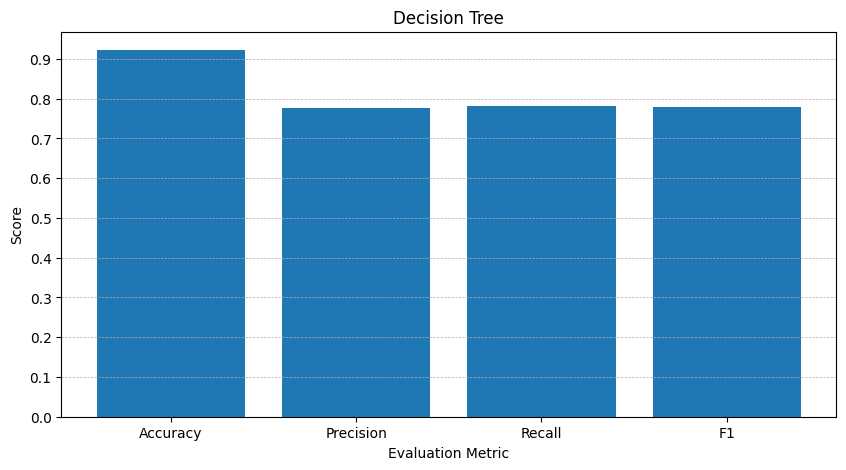

In [21]:
fig = results_barplot(metric_funcs, metric_vals, "Decision Tree")

#### Results of New, Existing, and Unknown Businesses

In [22]:
### Function to plot compare metrics

def results_stacked_barplot(metric_funcs, metric_dict, title):
    fig = plt.subplots(figsize = (10, 5))
    bar_width = 0.2
    
    metric_names = []

    for func in metric_funcs:
        separator = func.__name__.index('_')
        name = func.__name__[:separator].capitalize()
        metric_names.append(name)

    bar1 = np.arange(len(metric_names))
    bar2 = [x + bar_width for x in bar1]
    bar3 = [x + bar_width for x in bar2]
    bars = [bar1, bar2, bar3]
    bar_iter = 0

    for category in metric_dict.keys():
        plt.bar(bars[bar_iter], metric_dict[category], width=bar_width, label=category)
        bar_iter += 1

    plt.yticks(np.arange(0.0, 1.0, 0.1))
    plt.xticks([r + bar_width for r in range(len(metric_names))], metric_names)

    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.title(title)
    plt.xlabel("Evaluation Metric")
    plt.ylabel("Score")
    plt.legend()
    
    return fig

In [23]:
### Making a copy of testing data and appending real values (Y) and predicted values
eval_X = X_test.copy()
eval_X['Outcome'] = Y_test.copy()
eval_X['Prediction'] = predictions.copy()

In [24]:
new_business_prediction = eval_X[eval_X['NewExist'] == 'New']['Prediction']
new_business_outcome = eval_X[eval_X['NewExist'] == 'New']['Outcome']

existing_business_prediction = eval_X[eval_X['NewExist'] == 'Existing']['Prediction']
existing_business_outcome = eval_X[eval_X['NewExist'] == 'Existing']['Outcome']

unknown_business_prediction = eval_X[eval_X['NewExist'] == 'Unknown']['Prediction']
unknown_business_outcome = eval_X[eval_X['NewExist'] == 'Unknown']['Outcome']

new_business_metrics = evaluate_results(metric_funcs, new_business_outcome, new_business_prediction, 
                                        "Decision Tree - New Businesses")
print()
existing_business_metrics = evaluate_results(metric_funcs, existing_business_outcome, existing_business_prediction,
                                            "Decision Tree - Existing Businesses")
print()
unknown_business_metrics = evaluate_results(metric_funcs, unknown_business_outcome, unknown_business_prediction,
                                            "Decision Tree - Unknown Businesses")

Decision Tree - New Businesses
accuracy_score	0.9078123761983995
precision_score	0.7485238296077604
recall_score	0.7577924850555081
f1_score	0.7531296414173563

Decision Tree - Existing Businesses
accuracy_score	0.9279144451719515
precision_score	0.7887641462644844
recall_score	0.7931268984902752
f1_score	0.7909395062844742

Decision Tree - Unknown Businesses
accuracy_score	0.9045454545454545
precision_score	0.45454545454545453
recall_score	0.5263157894736842
f1_score	0.4878048780487805


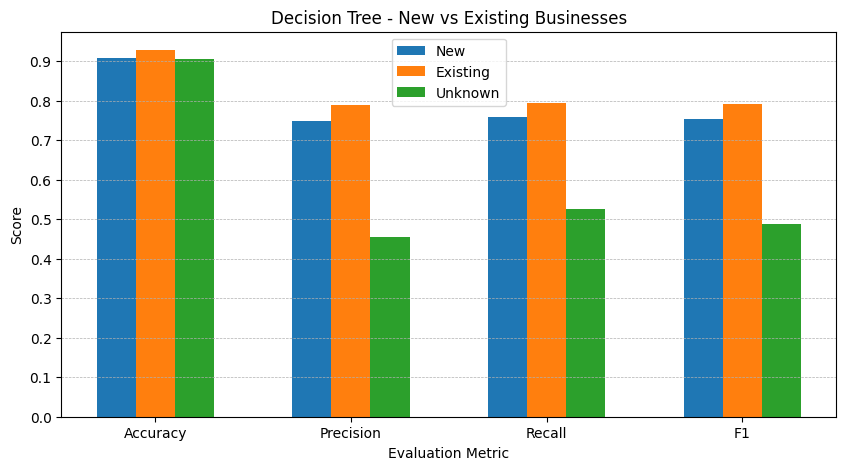

In [25]:
new_exist_metric_dict = {
    "New": new_business_metrics,
    "Existing": existing_business_metrics,
    "Unknown": unknown_business_metrics
}

fig = results_stacked_barplot(metric_funcs, new_exist_metric_dict, "Decision Tree - New vs Existing Businesses")

#### Results of Urban, Rural, and Unknown Businesses

In [26]:
urban_business_prediction = eval_X[eval_X['UrbanRural'] == 'Urban']['Prediction']
urban_business_outcome = eval_X[eval_X['UrbanRural'] == 'Urban']['Outcome']

rural_business_prediction = eval_X[eval_X['UrbanRural'] == 'Rural']['Prediction']
rural_business_outcome = eval_X[eval_X['UrbanRural'] == 'Rural']['Outcome']

unknown_business_prediction = eval_X[eval_X['UrbanRural'] == 'Unknown']['Prediction']
unknown_business_outcome = eval_X[eval_X['UrbanRural'] == 'Unknown']['Outcome']

urban_business_metrics = evaluate_results(metric_funcs, urban_business_outcome, urban_business_prediction,
                                            "Decision Tree - Urban Businesses")
print()
rural_business_metrics = evaluate_results(metric_funcs, rural_business_outcome, rural_business_prediction,
                                            "Decision Tree - Rural Businesses")
print()
unknown_business_metrics = evaluate_results(metric_funcs, unknown_business_outcome, unknown_business_prediction,
                                            "Decision Tree - Unknown Businesses")

Decision Tree - Urban Businesses
accuracy_score	0.9115894429407423
precision_score	0.8192918192918193
recall_score	0.8201501658809149
f1_score	0.8197207678883072

Decision Tree - Rural Businesses
accuracy_score	0.8956109134045077
precision_score	0.7019326065411299
recall_score	0.739686684073107
f1_score	0.7203152809560133

Decision Tree - Unknown Businesses
accuracy_score	0.9463288232373386
precision_score	0.632181471274115
recall_score	0.6336591585210369
f1_score	0.6329194524036931


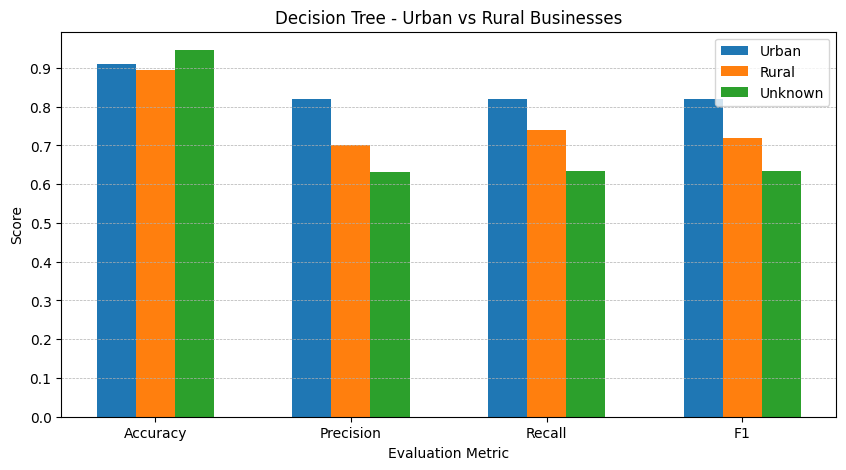

In [27]:
urban_rural_metric_dict = {
    "Urban": urban_business_metrics,
    "Rural": rural_business_metrics,
    "Unknown": unknown_business_metrics
}

fig = results_stacked_barplot(metric_funcs, urban_rural_metric_dict, "Decision Tree - Urban vs Rural Businesses")